# Slope distributions
Show the difference types of slope distributions used to compute roughness.

In [1]:
import os
os.chdir('/home/ctaiudovicic/projects/roughness')
import numpy as np
import matplotlib.pyplot as plt
from roughness import roughness as r
plt.style.use('dark_background')

## RMS (Shepard 1995)

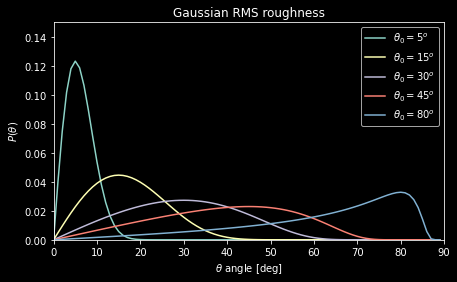

In [2]:
thetadeg = np.arange(90)
thetarad = np.radians(thetadeg)
theta0deg = (5, 15, 30, 45, 80)
plt.figure(figsize=(7, 4))
for t0 in theta0deg:
    theta0 = np.radians(t0)
    slopes = r.slope_dist(thetarad, theta0, 'rms')
    plt.plot(thetadeg, slopes, label=f'$\\theta_0={t0}^o$')
plt.title('Gaussian RMS roughness')
plt.ylabel('$P(\\theta)$')
plt.xlabel('$\\theta$ angle [deg]')
plt.xlim(0, 90)
plt.ylim(0, 0.15)
plt.legend()
# plt.savefig('docs/img/rms_slopes.png', dpi=300)

## Theta-bar (Hapke 1984)

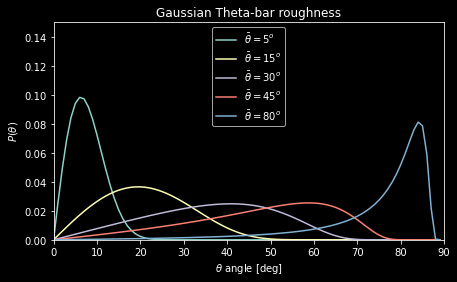

In [3]:
plt.figure(figsize=(7, 4))
for t0 in theta0deg:
    theta0 = np.radians(t0)
    slopes = r.slope_dist(thetarad, theta0, 'tbar')
    label = '$\\bar{\\theta}=$'
    plt.plot(thetadeg, slopes, label=label+f'${t0}^o$')
plt.title('Gaussian Theta-bar roughness')
plt.ylabel('$P(\\theta)$')
plt.xlabel('$\\theta$ angle [deg]')
plt.xlim(0, 90)
plt.ylim(0, 0.15)
plt.legend()
# plt.savefig('docs/img/tbar_slopes.png', dpi=300)

## Correcting for viewing geometry

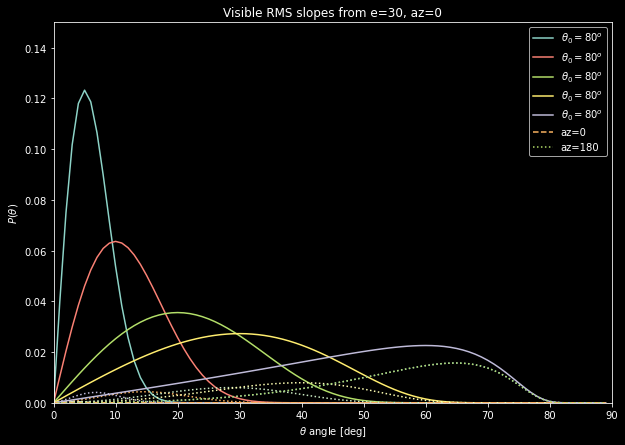

In [4]:
sc_theta = 30
sc_az = 0
sc_vector = r.sph2cart(sc_theta, sc_az)
thetadeg = np.arange(90)
thetarad = np.radians(thetadeg)

thetas, azs = r.get_facet_grids(np.zeros((len(thetadeg), len(thetarad))))
facet_vectors = r.sph2cart(np.radians(thetas), np.radians(azs))

rms_arr = (5, 10, 20, 30, 60)
plt.figure(figsize=(10, 7))
for rms in rms_arr:
    slopes = r.slope_dist(thetarad, np.radians(rms), 'rms')
    view_corr = r.view_correction(facet_vectors, sc_vector)
    vslopes = view_corr * slopes
    plt.plot(thetadeg, slopes, label=f'$\\theta_0={t0}^o$')
    plt.plot(thetadeg, vslopes[0], '--')
    plt.plot(thetadeg, vslopes[len(vslopes)//2], ':')
plt.title(f'Visible RMS slopes from e={sc_theta}, az={sc_az}')
plt.ylabel('$P(\\theta)$')
plt.xlabel('$\\theta$ angle [deg]')
plt.xlim(0, 90)
plt.ylim(0, 0.15)

plt.plot(thetadeg, vslopes[0], '--', label='az=0')
plt.plot(thetadeg, vslopes[len(vslopes)//2], ':', label='az=180')
plt.legend()
# plt.savefig('docs/img/vis_slopes.png', dpi=300)